The task is to build a spam detector.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
from sklearn.naive_bayes import MultinomialNB

In [2]:
# download the dataset: collection of SMS texts labeled as spam and ham  
# original dataset on Kaggle: https://www.kaggle.com/uciml/sms-spam-collection-dataset
!wget https://lazyprogrammer.me/course_files/spam.csv

--2022-10-21 15:21:28--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv.2’

spam.csv.2          100%[===================>] 491,86K  --.-KB/s    in 0,04s   

2022-10-21 15:21:28 (11,6 MB/s) - ‘spam.csv.2’ saved [503663/503663]



In [3]:
# save the dataset in Pandas dataframe
df = pd.read_csv('spam.csv', encoding='ISO-8859-1', usecols=['v1', 'v2'])

In [4]:
df.columns = ['labels', 'data']

In [5]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


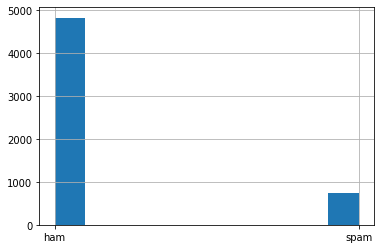

In [6]:
# check the labels distribution: it looks imbalanced
df['labels'].hist()

In [7]:
# assign integers to labels
df['bin_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['bin_labels'].to_numpy()

In [8]:
# create train and test sets
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size = 0.33)

In [9]:
# use count vectorizer
featurizer = CountVectorizer(decode_error='ignore')
Xtrain = featurizer.fit_transform(df_train)
Xtest = featurizer.transform(df_test)

In [10]:
# fit the model and calculate the accuracy
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print('Train accuracy:', model.score(Xtrain, Ytrain))
print('Test accuracy:', model.score(Xtest, Ytest))

Train accuracy: 0.993570854540584
Test accuracy: 0.9815116911364872


In [11]:
# since the dataset is imbalanced, we should use other evaluation metrics, such as F1 and AUC
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
print('Train F1:', f1_score(Ytrain, Ptrain))
print('Test F1:', f1_score(Ytest, Ptest))

Train F1: 0.9759036144578314
Test F1: 0.9291666666666667


In [12]:
prob_train = model.predict_proba(Xtrain)[:, 1]
prob_test = model.predict_proba(Xtest)[:, 1]
print('Train AUC:', roc_auc_score(Ytrain, prob_train))
print('Test AUC:', roc_auc_score(Ytest, prob_test))

Train AUC: 0.9923321991957934
Test AUC: 0.9787563831302261


In [13]:
# create confusion matrix for the train set
cm = confusion_matrix(Ytrain, Ptrain)
cm

array([[3223,   10],
       [  14,  486]])

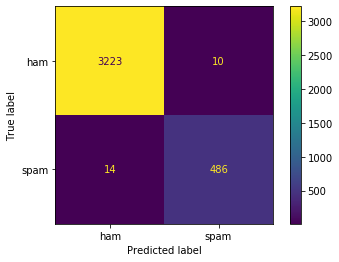

In [14]:
cm_plot = ConfusionMatrixDisplay(cm, display_labels=df.labels.unique())
cm_plot.plot(values_format='d')

In [15]:
# create confusion matrix for the test set
cm_test = confusion_matrix(Ytest, Ptest)
cm_test

array([[1582,   10],
       [  24,  223]])

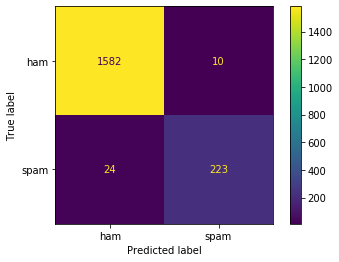

In [16]:
cm_test_plot = ConfusionMatrixDisplay(cm_test, display_labels=df.labels.unique())
cm_test_plot.plot(values_format='d')